In [68]:
import random
import timeit
from statistics import mean

import numpy as np
from matplotlib import pyplot as plt
# from scipy import optimize
# from scipy.optimize import minimize
# from scipy.spatial import distance
import networkx as nx

### Subtask 1

In [69]:
n = 100
m = 500
weight_range = (3, 10)

In [70]:
matrix = np.zeros((n, n), dtype=int)

In [71]:
edges = 0
while edges < m:
    a = random.randint(0, n - 1)
    b = random.randint(0, n - 1)
    if a == b or matrix[a, b] != 0:
        continue
    weight = random.randint(*weight_range)
    matrix[a, b] = weight
    matrix[b, a] = weight
    edges += 1

In [72]:
G = nx.from_numpy_matrix(matrix)

{(0, 19): Text(-0.0894409652529068, -0.8072340158013747, '5'),
 (0, 32): Text(0.32383922827419376, -0.8554157831661247, '5'),
 (0, 49): Text(0.33985175826107694, -0.7907749552660344, '8'),
 (0, 69): Text(0.17741881639611498, -0.7403554321807948, '10'),
 (0, 88): Text(0.14376112740365599, -0.6242855056619638, '6'),
 (0, 95): Text(0.1544658537733792, -0.6810264194119713, '7'),
 (1, 8): Text(-0.15622671878412833, -0.4775004750988895, '9'),
 (1, 10): Text(0.22510687081512218, -0.40316062511632744, '7'),
 (1, 13): Text(0.06668259796138648, -0.3123231895165969, '7'),
 (1, 26): Text(0.3446490569671216, -0.3904252712090614, '4'),
 (1, 30): Text(-0.15055892628442663, -0.42404626698928694, '4'),
 (1, 67): Text(-0.053789016426824016, -0.4826617168855247, '3'),
 (1, 82): Text(0.30010206670217976, -0.33891411836655355, '5'),
 (1, 88): Text(0.06094456526591767, -0.3980683748941226, '10'),
 (1, 89): Text(-0.06149463565308261, -0.5354514428180548, '9'),
 (1, 94): Text(0.055140330085378664, -0.24127225

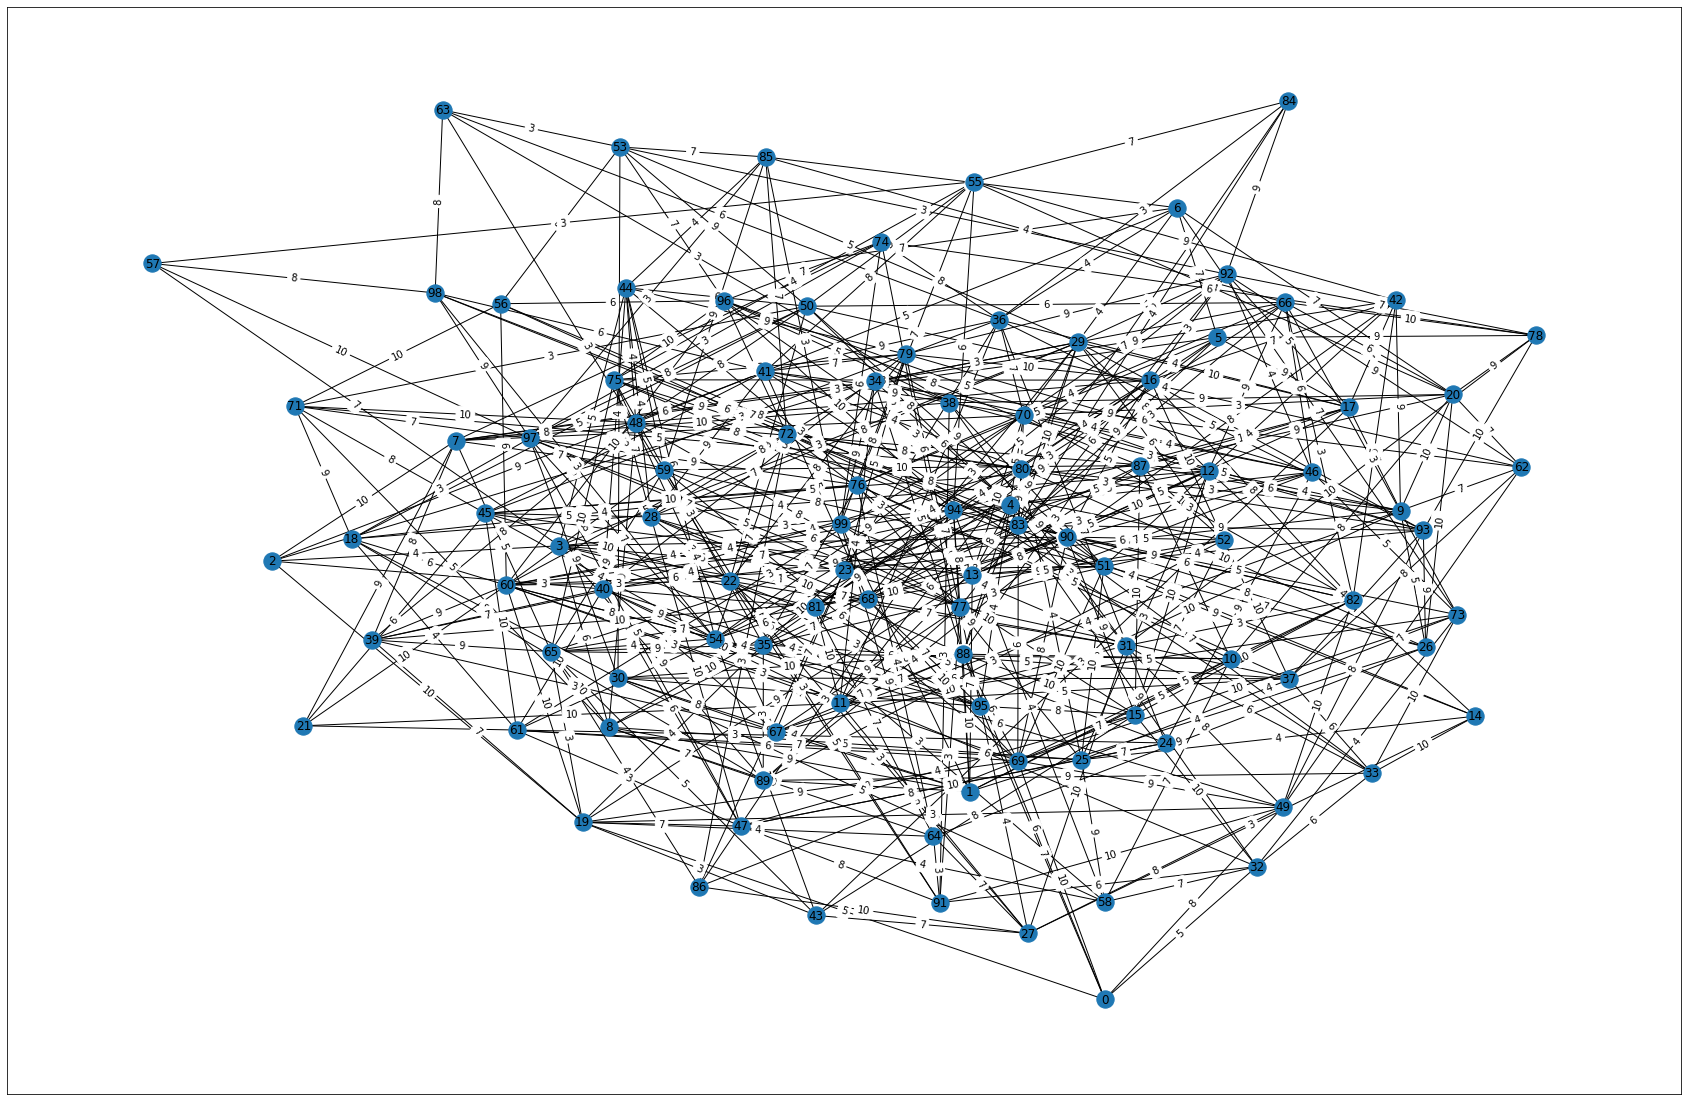

In [73]:
plt.figure(figsize=(30, 20))
pos = nx.spring_layout(G, seed=0)
nx.draw_networkx(G, pos)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

In [74]:
matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 5],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 9, 0],
       [0, 0, 0, ..., 9, 0, 0],
       [0, 5, 0, ..., 0, 0, 0]])

In [98]:
a = random.randint(0, n - 1)
b = random.randint(0, n - 1)
a, b

(64, 78)

In [99]:
path = nx.dijkstra_path(G, a, b)
path

[64, 76, 66, 78]

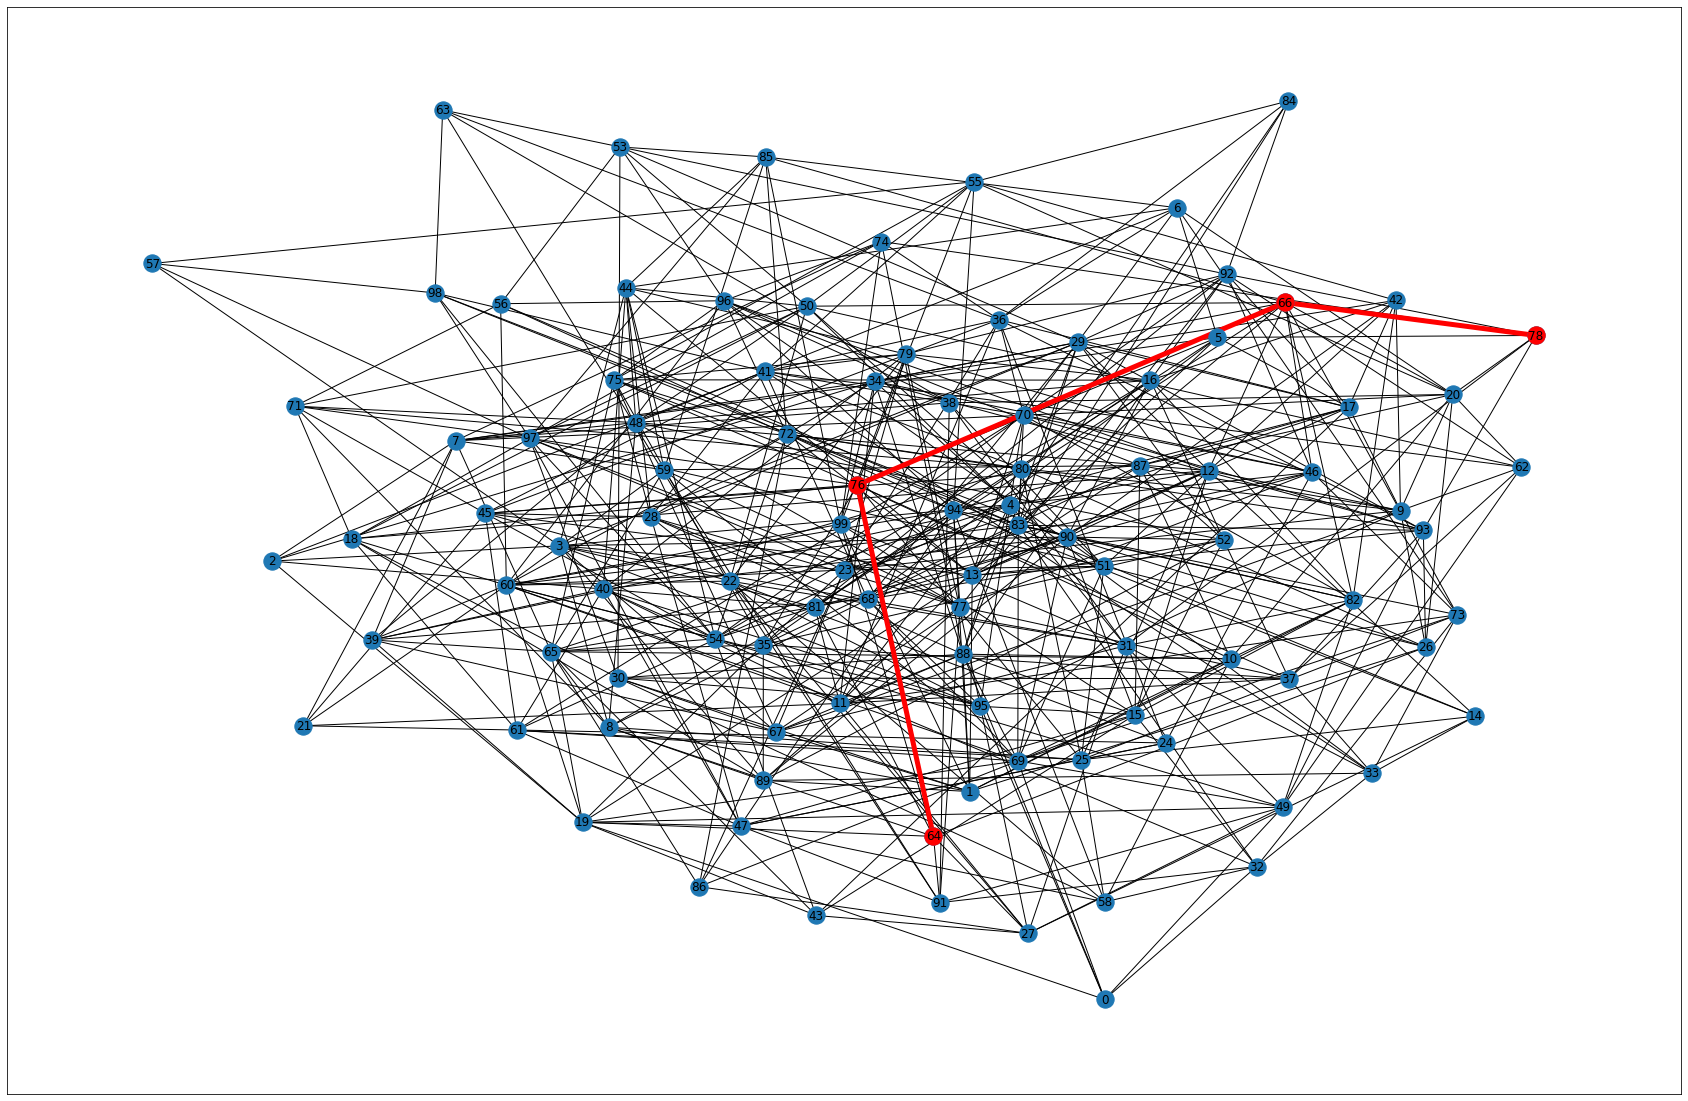

In [100]:
plt.figure(figsize=(30, 20))
pos = nx.spring_layout(G, seed=0)
nx.draw_networkx(G, pos)
labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
path_edges = list(zip(path, path[1:]))
nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='r')
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=5)
plt.show()

In [77]:
start = timeit.default_timer()
nx.dijkstra_path(G, a, b)
end = timeit.default_timer()
end - start

0.0002520000000458822

In [78]:
timeit_times = 10

In [79]:
execution_time = []
for j in range(0, timeit_times):
    start = timeit.default_timer()
    nx.dijkstra_path(G, a, b)
    end = timeit.default_timer()
    execution_time.append(end - start)
mean(execution_time)

0.00017446659999222902

In [80]:
nx.bellman_ford_path(G, a, b)

[68, 29, 93, 70]

In [81]:
start = timeit.default_timer()
nx.bellman_ford_path(G, a, b)
end = timeit.default_timer()
end - start

0.0008385000000998843

In [82]:
execution_time = []
for j in range(0, timeit_times):
    start = timeit.default_timer()
    nx.bellman_ford_path(G, a, b)
    end = timeit.default_timer()
    execution_time.append(end - start)
mean(execution_time)

0.0007649248000689112

In [108]:
grid_size_y = 10
grid_size_x = 20
obstacles_number = 40

In [109]:
G = nx.grid_2d_graph(grid_size_y, grid_size_x)

In [110]:
removed = 0
while removed < obstacles_number:
    y = random.randint(0, grid_size_y - 1)
    x = random.randint(0, grid_size_x - 1)
    if (y, x) not in G:
        continue
    G.remove_node((y, x))
    removed += 1

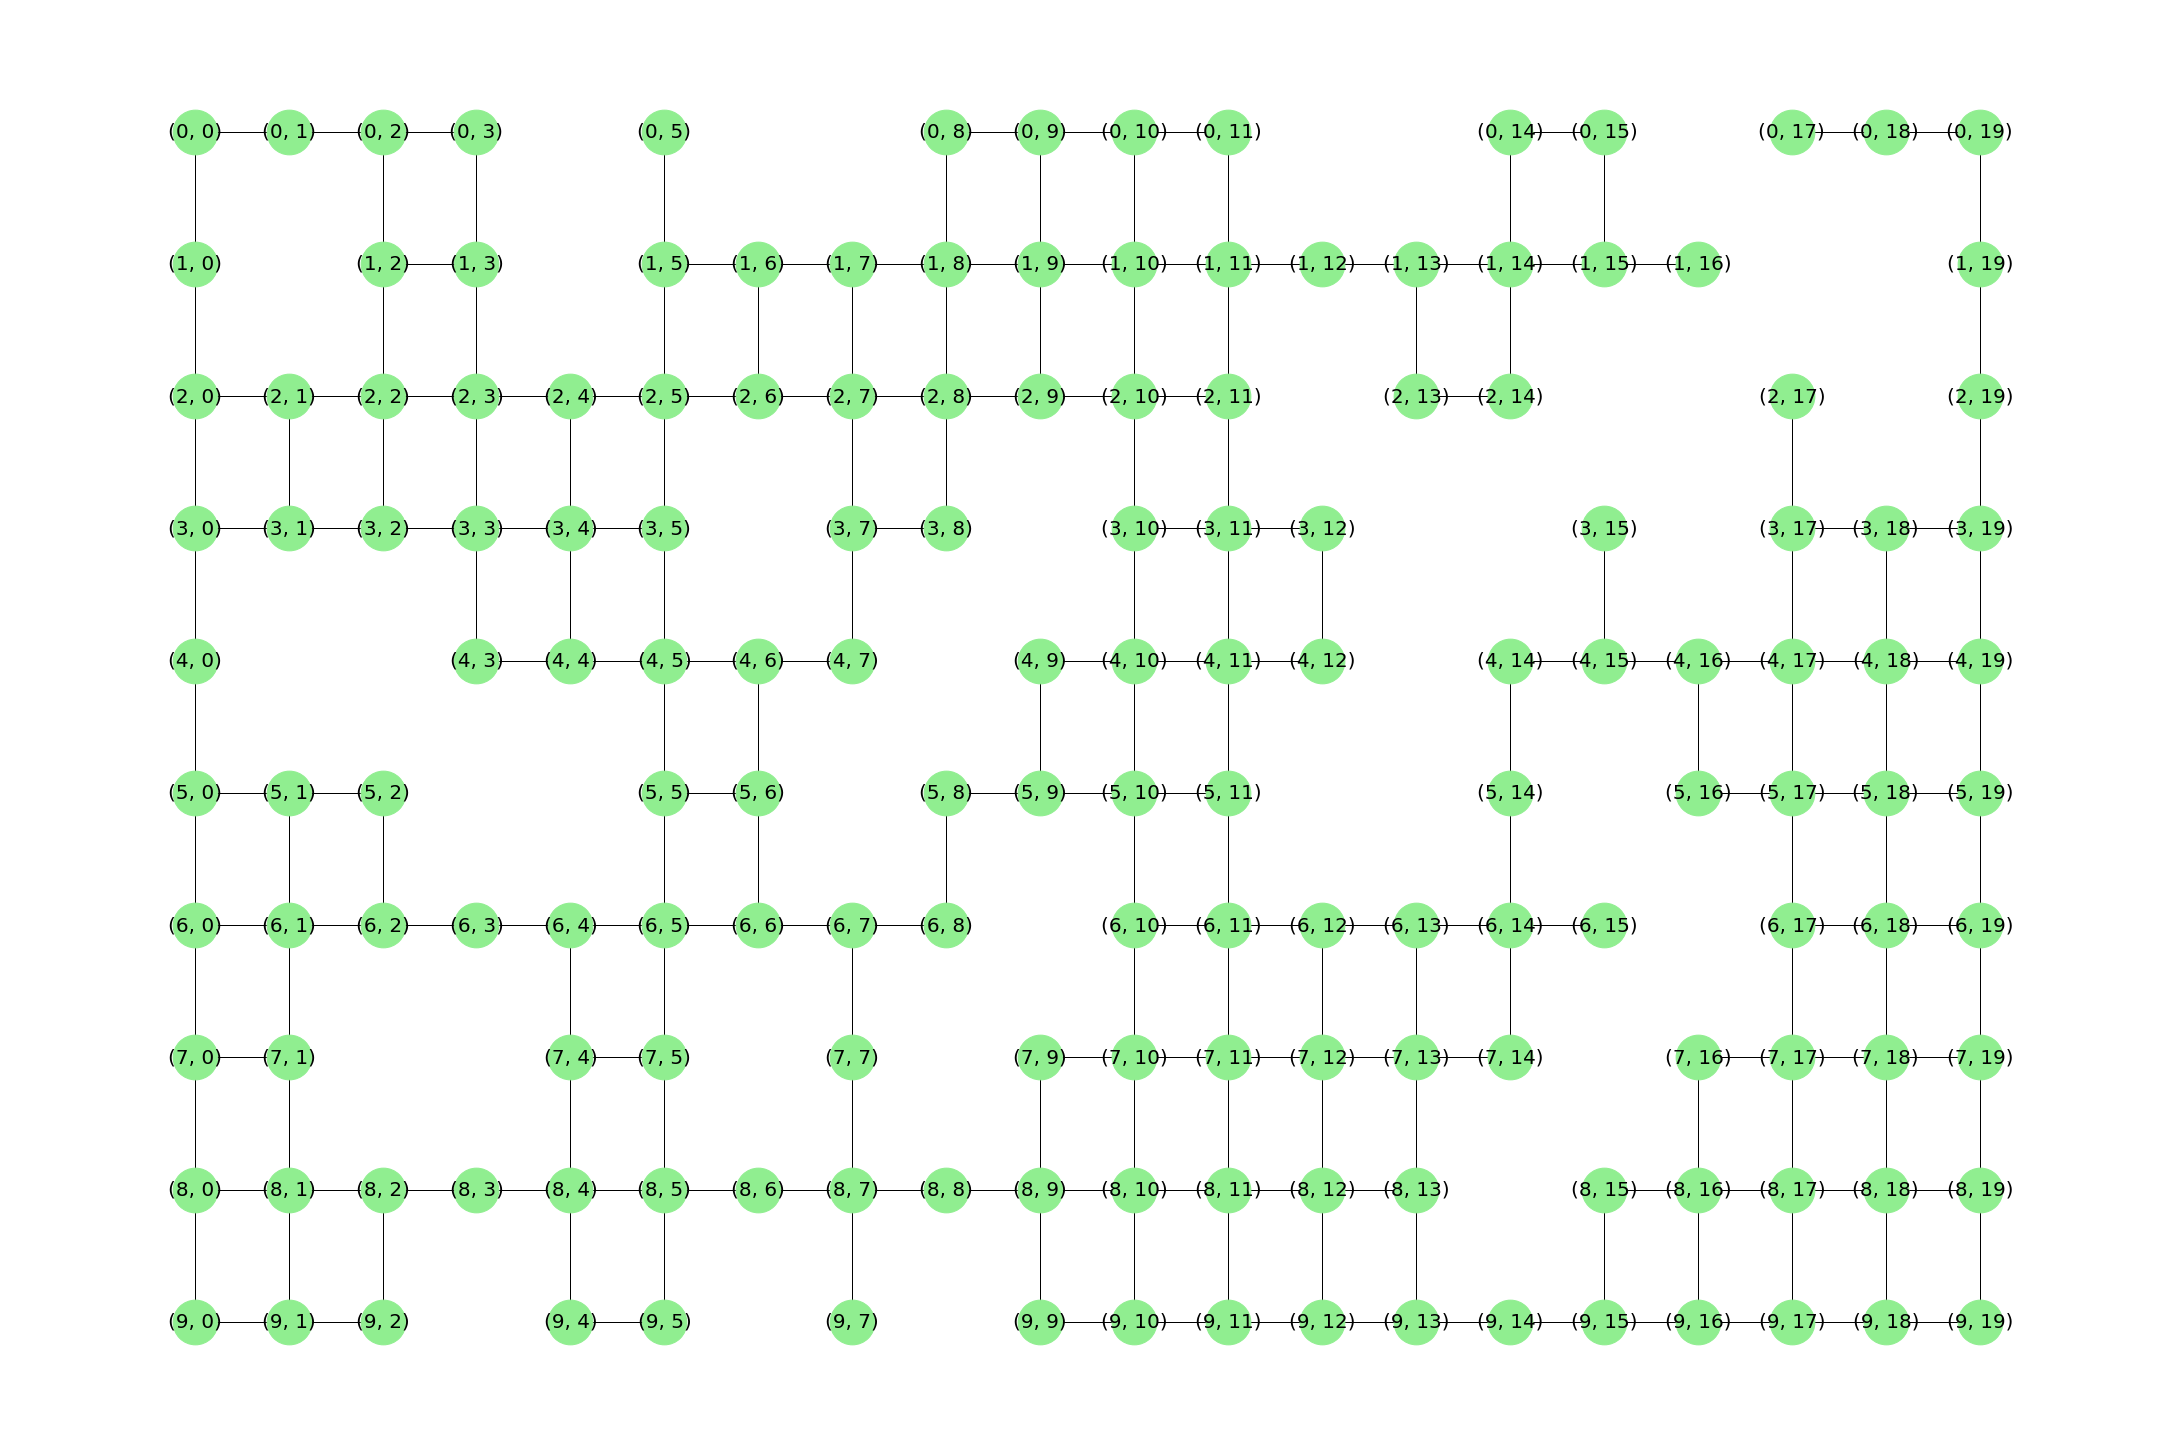

In [111]:
plt.figure(figsize=(30, 20))
pos = {(x, y): (y, -x) for x, y in G.nodes()}
nx.draw(G, pos=pos,
        node_color='lightgreen',
        with_labels=True,
        node_size=2000,
        font_size=20,
        )

In [113]:
a = random.choice(list(G.nodes.keys()))
b = random.choice(list(G.nodes.keys()))
a, b

((0, 5), (8, 18))

In [115]:
path = nx.astar_path(G, a, b)
path

[(0, 5),
 (1, 5),
 (2, 5),
 (3, 5),
 (4, 5),
 (5, 5),
 (6, 5),
 (7, 5),
 (8, 5),
 (8, 6),
 (8, 7),
 (8, 8),
 (8, 9),
 (9, 9),
 (9, 10),
 (9, 11),
 (9, 12),
 (9, 13),
 (9, 14),
 (9, 15),
 (8, 15),
 (8, 16),
 (8, 17),
 (8, 18)]

In [123]:
print(" → ".join(list(map(str,path))))

(0, 5) → (1, 5) → (2, 5) → (3, 5) → (4, 5) → (5, 5) → (6, 5) → (7, 5) → (8, 5) → (8, 6) → (8, 7) → (8, 8) → (8, 9) → (9, 9) → (9, 10) → (9, 11) → (9, 12) → (9, 13) → (9, 14) → (9, 15) → (8, 15) → (8, 16) → (8, 17) → (8, 18)


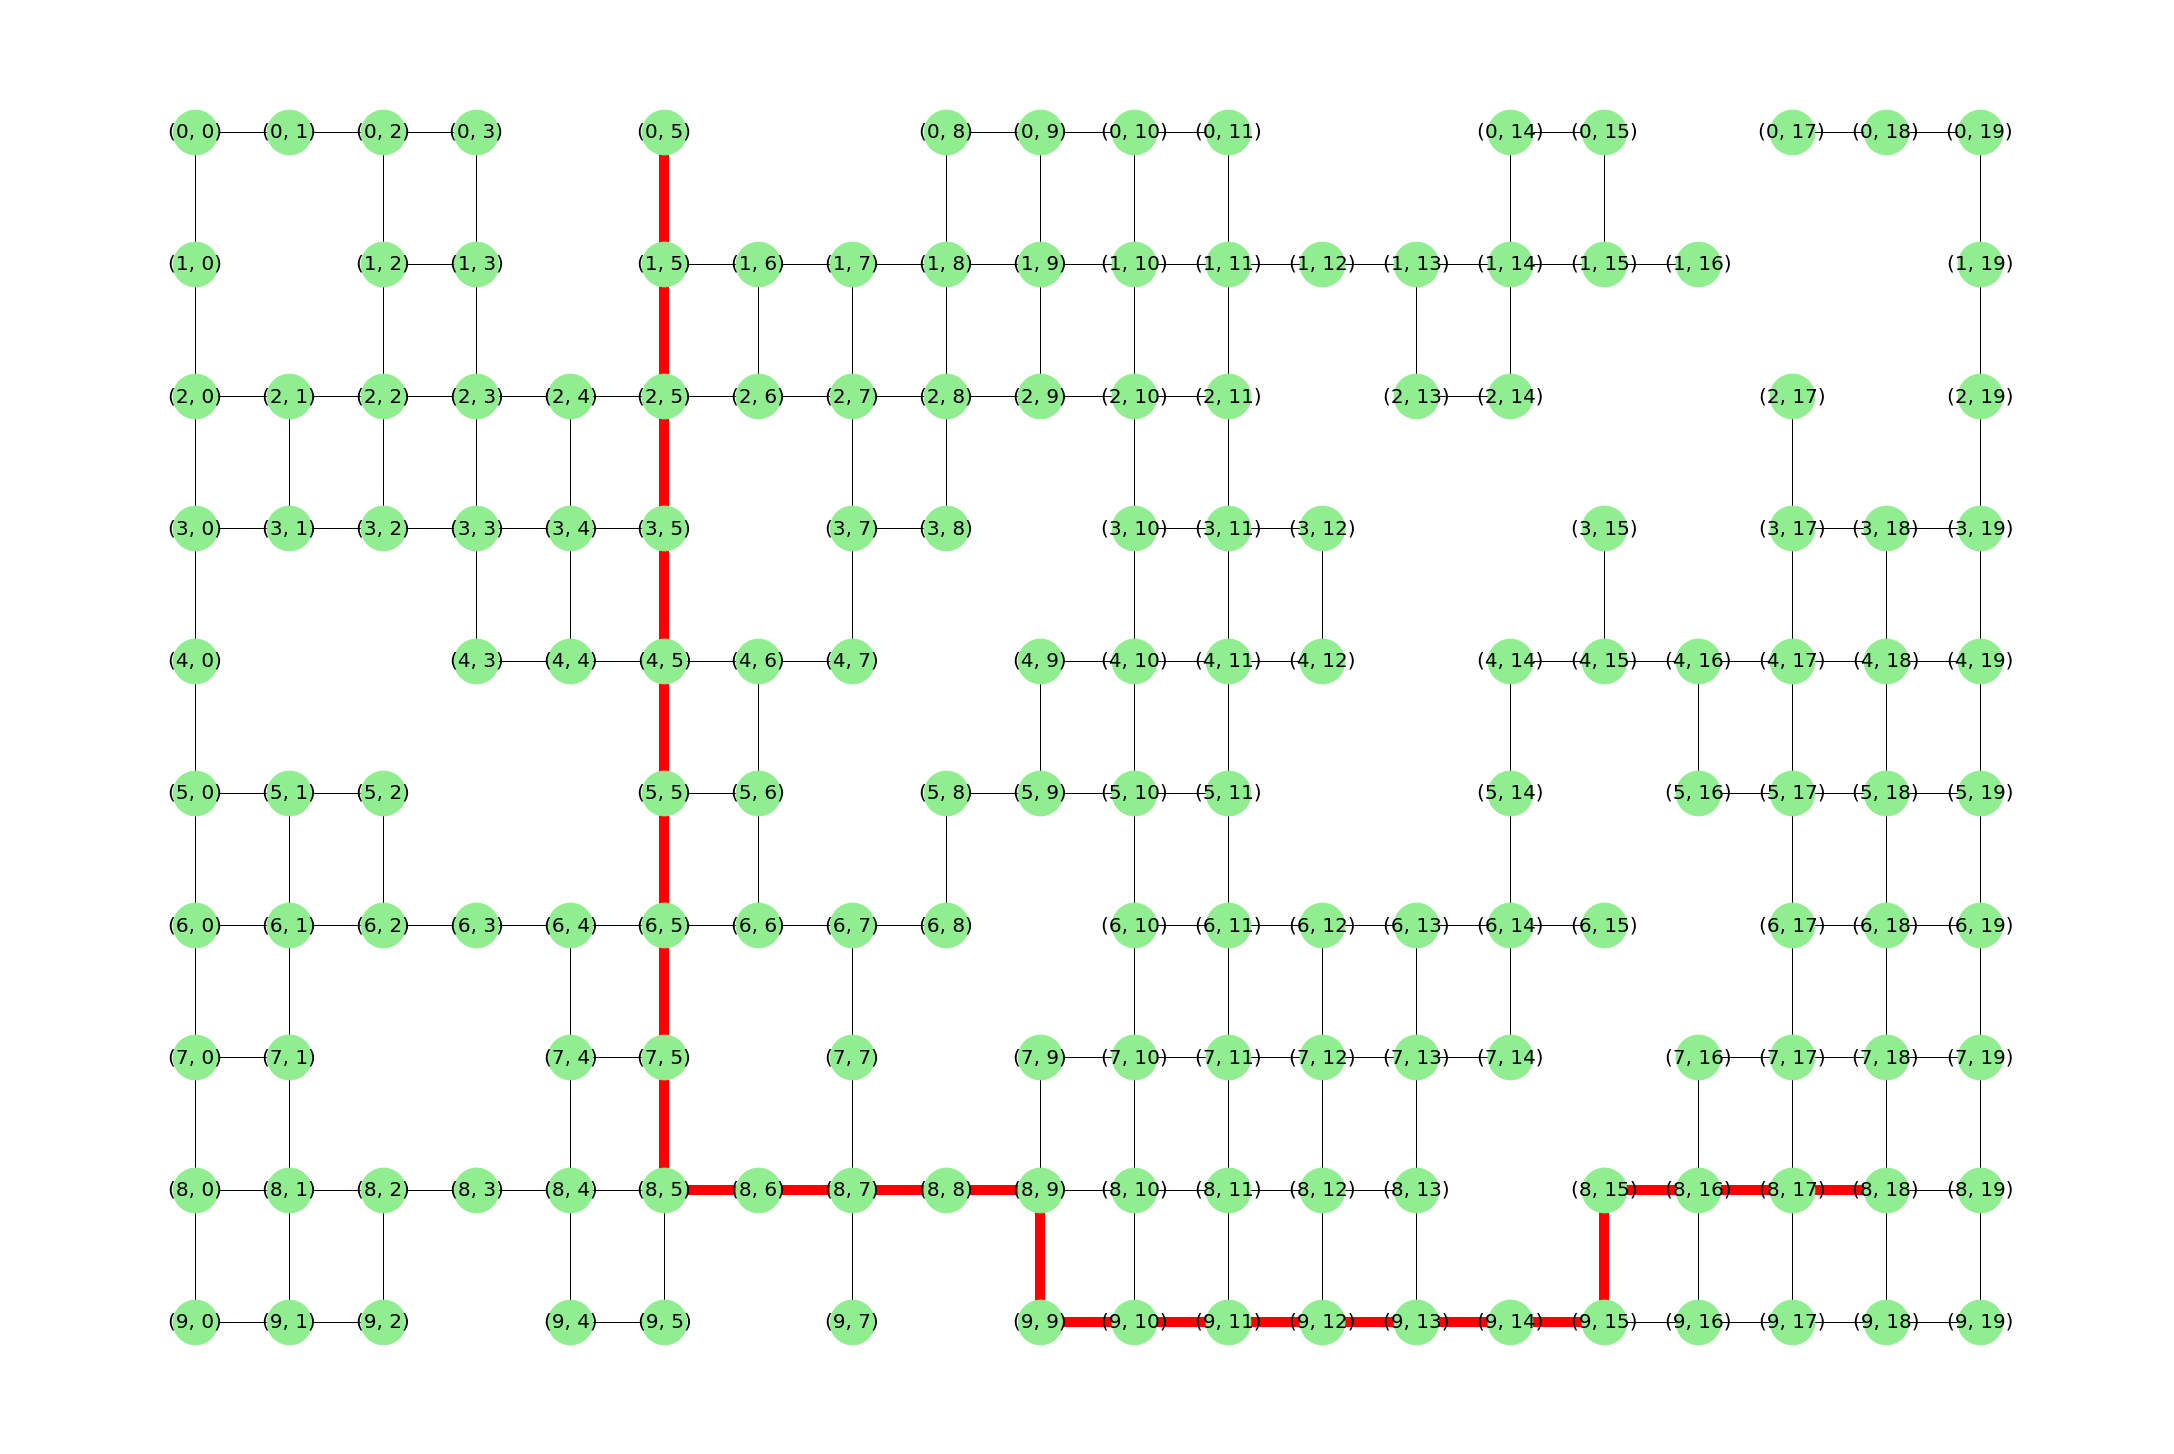

In [116]:
plt.figure(figsize=(30, 20))
pos = {(x, y): (y, -x) for x, y in G.nodes()}
nx.draw(G, pos=pos,
        node_color='lightgreen',
        with_labels=True,
        node_size=2000,
        font_size=20,
        )
path_edges = list(zip(path, path[1:]))
# nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='r')
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=10)
plt.show()

In [66]:
start = timeit.default_timer()
nx.astar_path(G, a, b)
end = timeit.default_timer()
end - start

0.0005447920000278828

In [130]:
a = random.choice(list(G.nodes.keys()))
b = random.choice(list(G.nodes.keys()))
a, b

((4, 18), (8, 0))

In [67]:
execution_time = []
for j in range(0, 5):
    start = timeit.default_timer()
    nx.astar_path(G, a, b)
    end = timeit.default_timer()
    execution_time.append(end - start)
mean(execution_time)

0.00044450800005506607